In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
259/(2*0.060)

2158.3333333333335

6 мм в первом эксперименте
1 Гц во втором

In [3]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

In [4]:
def ecp1(data,nm):
    fr=list(set(set(np.array(data.frq[np.invert(np.isnan(data.frq))]))))
    fig,ax = plt.subplots(figsize=(9,6))
    ax.set_xlabel(r"Номер резонанса")
    ax.set_ylabel(r"Удлинение трубы, м")
    ax.minorticks_on()
    ax.grid(which='major')
    ax.grid(which='minor', linestyle=':')
    kl,bl,fl=[],[],[]
    c=['blue','green','orange','red','purpule']
    cit=0
    for f in fr:
        d=data[data.frq==f]
        d.L=d.L/1000
        d.L=d.L-np.array(d.L)[0]
        k,b,sigk,sigb=getkb(d.n,d.L)
        kl.append(k)
        bl.append(b)
        fl.append(f)
        print(f,k,sigk/k,b,sigb/b, 'c=', k*2*f,sigk/k)
        ax.errorbar(d.n,d.L, xerr=0, yerr=0.006, fmt='.',color=c[cit], label='Экспериментальные данные\n для {0:d}'.format(fr.index(f)+1),markersize=5,capsize=0.01, elinewidth=0.5)
        Xp=np.linspace(np.min(d.n),np.max(d.n),10)
        ax.plot(Xp,Xp*k+b,linewidth=0.5,color=c[cit], label='Прямая группы {0:d}'.format(fr.index(f)+1))
        ax.set_ylim(ymin=0)
        ax.set_xlim(xmin=0)
        cit+=1
    ax.legend()
    fig.tight_layout()
    fig.savefig(nm+'.eps')
    return np.array(kl),np.array(bl),np.array(fl)

In [22]:
def ecp2(data,nm):
    tp=set(np.array(data.temp[np.invert(np.isnan(data.temp))]))
    fig,ax = plt.subplots(figsize=(9,6))
    ax.set_xlabel(r"Номер резонанса")
    ax.set_ylabel(r"Частота волны, Гц")
    ax.minorticks_on()
    ax.grid(which='major')
    ax.grid(which='minor', linestyle=':')
    kl,bl,tl=[],[],[]
    c=['blue','green','orange','red','purpule']
    cit=0
    for T in tp:
        d=data[data.temp==T]
        k,b,sigk,sigb=getkb(d.n,d.frq)
        kl.append(k)
        bl.append(b)
        tl.append(T)
        L=0.74
        print(T,k,sigk/k,b+k*np.round(-b/k),sigb/b, 'c=', k*2*L,sigk/k)
        ax.errorbar(d.n-np.round(-b/k),d.frq, xerr=0, yerr=2, fmt='.', color=c[cit], label='Экспериментальные данные\nдля T={0:.0f} С'.format(float(T)),markersize=5,capsize=0.01, elinewidth=0.5)
        Xp=np.linspace(0,np.max(d.n-np.round(-b/k)),10)
        ax.plot(Xp,(Xp-np.round(b/k))*k+b,linewidth=0.5,color=c[cit], label='T={0:.0f} С'.format(float(T)))
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymin=0)
        cit+=1
    ax.legend()
    fig.tight_layout()
    fig.savefig(nm+'.eps')
    return kl,bl,tl

In [14]:
def make_c(kl,bl,fl):
    #for i in range(len(fl)):
    #    print(fl[i],kl[i],bl[i], 'c=', kl[i]*2*fl[i])
    k,b,sigk,sigb=getkb(fl,kl*2*fl)
    print(k,b,sigk,sigb)
    print(np.sqrt(np.sum((kl*fl*2-np.average(kl*fl*2))**2)/(kl.shape[0]-1))/np.average(kl*fl*2))
    return b,sigb, np.average(kl*fl*2)

In [15]:
data=pd.read_excel('exp1.xlsx', header=1)

C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.L=d.L/1000
C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.L=d.L-np.array(d.L)[0]
C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

3410 0.05099999999999999 0.0030376339970493394 -0.0005999999999999339 -0.3651483716730256 c= 347.81999999999994 0.0030376339970493394
5683 0.030742857142857162 0.00756292169499477 -0.000190476190476227 -2.084666240270376 c= 349.4233142857145 0.00756292169499477
4262 0.04059999999999998 0.0022030226379660856 -0.00019999999999993634 -0.6324555320439991 c= 346.07439999999986 0.0022030226379660856


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.0008741373028553133 343.88120353536056 0.0006741648570766218 0.6320901854876803
0.004816253438380996


(np.float64(1.4307561164629845),
 np.float64(347.77257142857144),
 np.float64(0.006890880597589181))

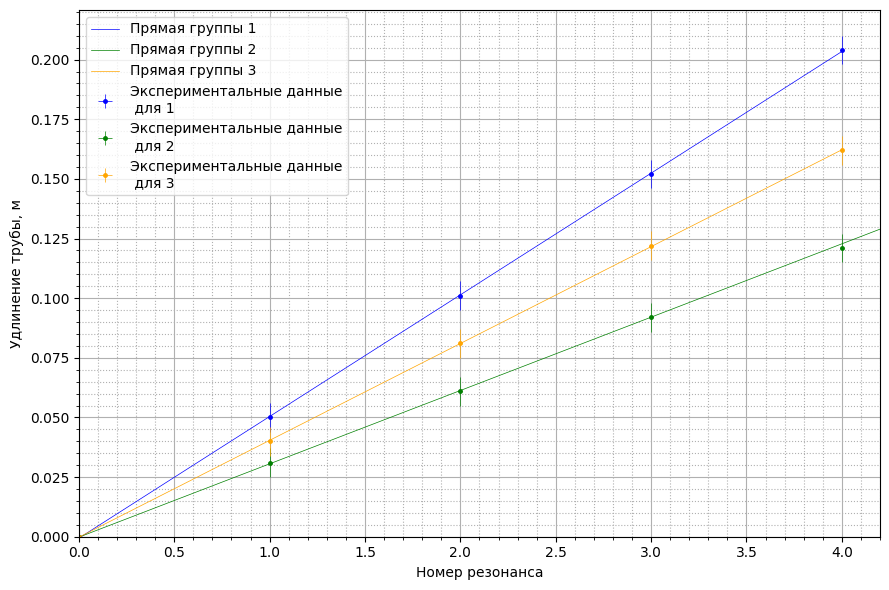

In [16]:
b,sigb,c=make_c(*ecp1(data,'fig1'))
c*c*29/(8.31*295)/1000,c,1.67496*c*29/(8.31*295)/1000

C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.L=d.L/1000
C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.L=d.L-np.array(d.L)[0]
C:\Users\Daniil\AppData\Local\Temp\ipykernel_15052\2428978109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

2158 0.0625 0.0026666666666587484 -0.0001666666666666483 -0.8164965809253916 c= 269.75 0.0026666666666587484
3237 0.04039999999999999 0.004427857381186557 0.0008000000000000507 0.3162277660167361 c= 261.54959999999994 0.004427857381186557
2590 0.0519 0.003604679563366495 -9.999999999998899e-05 -2.0916500663356876 c= 268.842 0.003604679563366495


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-0.007888598758727439 287.7106870294795 0.0014483630728583771 0.6422118010187933
0.01685465515050351
266.71386666666666
1.2767939846133984


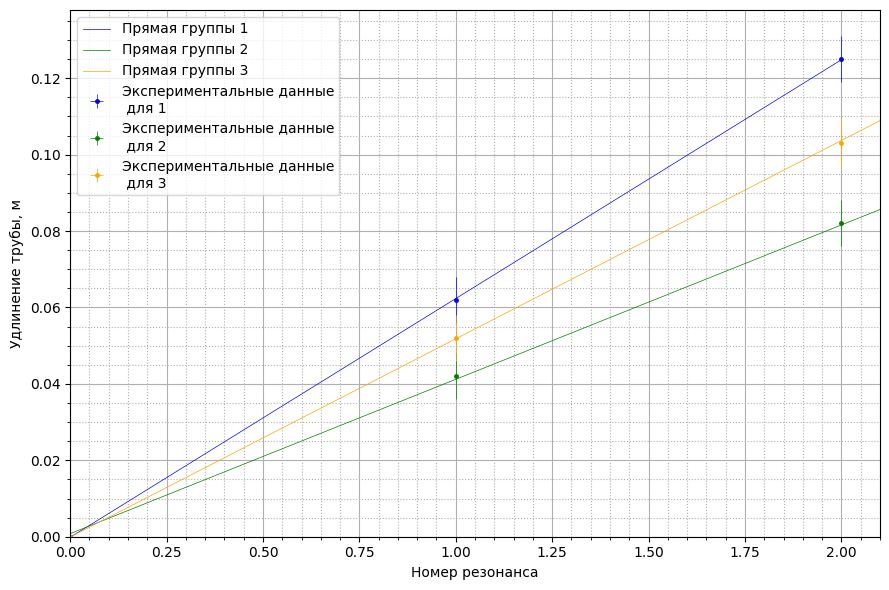

In [29]:
data=pd.read_excel('exp1_co2.xlsx', header=1)
b,sigb,c=make_c(*ecp1(data,'fig_co2'))
print(c)
print((c)**2*44/(8.31*295)/1000)

In [18]:
print((265)**2*44/(8.31*295)/1000)

1.2604377001366536


In [19]:
np.sqrt(8)

np.float64(2.8284271247461903)

In [25]:
data=pd.read_excel('exp2.xlsx', header=1)
set(np.array(data.temp[np.invert(np.isnan(data.temp))]))

{np.float64(22.0), np.float64(41.0), np.float64(55.0)}

41.0 238.03903345724896 0.0003982352713097255 4.600371747212762 0.0002089223630436838 c= 352.29776951672847 0.0003982352713097255
22.0 230.8928571428571 0.0003255092220653355 3.4642857142860066 0.00016214640525888147 c= 341.72142857142853 0.0003255092220653355
55.0 243.3928571428571 0.00030879194792452153 3.535714285714448 0.0001538372838996757 c= 360.22142857142853 0.00030879194792452153


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5603777063952329 176.3889052557508 0.002689503437171979 0.00011555143650531007


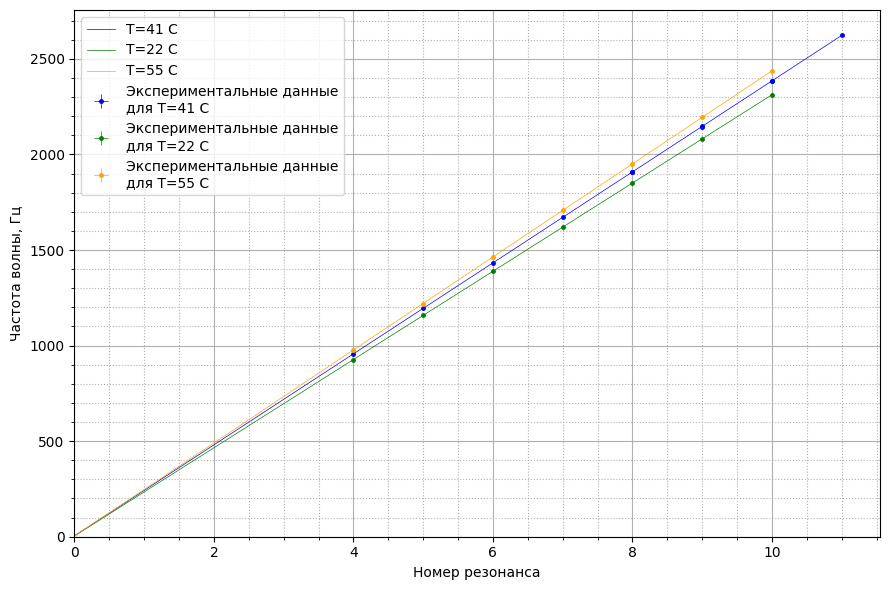

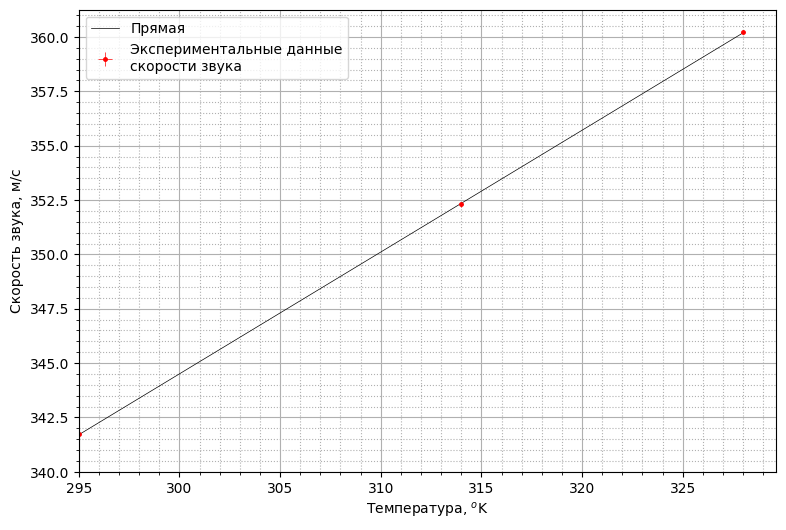

In [27]:
kl,bl,tl=ecp2(data,'fig_t')
L=0.74
tl=np.array(tl)
tl+=273
k,b,sigk,sigb=getkb(tl,np.array(kl)*2*L)

fig,ax = plt.subplots(figsize=(9,6))
ax.set_xlabel(r"Температура, $^o$K")
ax.set_ylabel(r"Скорость звука, м/с")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.errorbar(tl,np.array(kl)*2*L, xerr=0, yerr=0.1, fmt='.r', label='Экспериментальные данные\nскорости звука',markersize=5,capsize=0.01, elinewidth=0.5)
Xp=np.linspace(np.min(tl),np.max(tl),10)
ax.plot(Xp,Xp*k+b,linewidth=0.5,color="black", label='Прямая')
ax.set_xlim(xmin=np.min(Xp))
ax.set_ylim(ymin=340)
ax.legend()
fig.savefig('fig_c.eps')

print(k,b,sigk/k,sigb/b)